In [1]:
# %matplotlib notebook
%matplotlib inline
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt

import chainladder as cl
from generateTriangle import Creation_Triangle
from generateRandomTriangle import Creation_Random_Triangle

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import ward, dendrogram

import plotly.offline as offline
import plotly
# plotly.tools.set_credentials_file(username='n.naoufal', api_key='IKeJsuJpSDSZGVKMXJRi')
import plotly.plotly as py
import plotly.graph_objs as go
offline.init_notebook_mode()

from adspy_shared_utilities import plot_labelled_scatter
from knnimpute import (
    knn_impute_few_observed,
    knn_impute_with_argpartition,
    knn_impute_optimistic,
    knn_impute_reference,
)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


### parameters

In [2]:
IZAR = pd.read_csv("IZAR_Input_ResQ_Paid.txt", sep= '\t', decimal=",")
First_UWY = 1963
Run_Off_Year = 2006
Closing_Year = 2015
Seg = "2GL2"
Risk = "Attri"
Pays = None
first_dev = 300 # First development in the first year / must first_dev > val_dev*len(year_list)
len_dev = 10 # gap between each development in a year
val_dev = len_dev # number of development by year
begin_date = 1977
end_date = 2003

In [3]:
(Paid_inc ,Paid_Cum, OS, Incurred) = Creation_Triangle(IZAR, First_UWY, Run_Off_Year, Closing_Year, Seg, Risk, Pays)

# Solution 1: Cut out data

### 1.1 3D plot of Incurred  

In [4]:
data = [go.Surface(x=Incurred.index, y=Incurred.columns, z=Incurred.values.tolist(), colorscale='pink')]

layout = go.Layout(
    width=800,
    height=700,
    autosize=False,
    title='Incurred',
    scene=dict(
        xaxis=dict(
            title = 'Subscription year',
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            title = 'Devlopment year',
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            title = 'Incurred',
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    )
)

fig = dict(data=data, layout=layout)

# IPython notebook
offline.iplot(fig, filename='pandas-3d-surface', validate=False)

### 1.2 Correlation study

In [5]:
'Redéfinir le triangle sans les années nulles'
Triangle = Incurred
Triangle = Triangle[(Triangle.T != 0).any()]
num = Triangle._get_numeric_data()
num[num < 0] = 1
Triangle = Triangle.loc[:, (Triangle != 0).any(axis=0)]
Triangle = Triangle.replace(0,np.nan)
pd.options.mode.chained_assignment = None  # default='warn'
for col in Triangle.columns:
    bin_col = Triangle[col].isnull()
    a = np.where(bin_col == False)
    df_null = Triangle.loc[Triangle.index.isin(list(Triangle.index[a[0][0]:])),col].isnull()
    list_null = list(df_null[df_null==True].index)
    if (list_null!=[]):
        Triangle.loc[list_null,col] = 0
# np.where(df.as_matrix()<0)

In [6]:
Triangle

,36,48,60,72,84,96,108,120,132,144,...,360,372,384,396,408,420,432,444,456,468
1977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28087.113000,23601.446000,23685.270400,35376.226200,33331.328200,54991.290700,55000.541700,62704.323500,66837.29850,87679.6409
1978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,36478.039120,37113.845040,45246.114270,55035.085570,57886.631770,92093.349370,64930.123170,59131.787570,68802.49267,0.0000
1979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,174824.110782,181854.666325,189922.239205,190164.370538,188336.506138,192474.315272,188868.131338,202645.292872,0.00000,0.0000
1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,101344.586879,103689.222479,110546.982496,108054.422496,122292.373546,118163.267746,184842.013212,0.000000,0.00000,0.0000
1981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,52523.164963,54356.884536,46330.116520,45857.450670,46073.289284,54113.277720,0.000000,0.000000,0.00000,0.0000
1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,77691.297326,88787.153678,122488.603678,150046.310695,139472.410695,0.000000,0.000000,0.000000,0.00000,0.0000
1983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82188.206773,96301.404273,98681.891773,99367.861773,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000
1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,134926.964362,137276.925612,140759.364112,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000
1985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,61573.153190,69392.070190,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000
1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,58058.003333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000


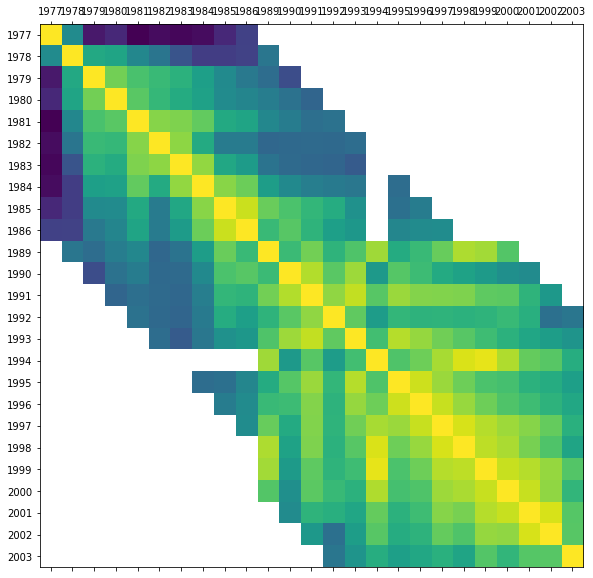

In [7]:
# plt.matshow(Triangle.T.corr(method='pearson', min_periods=1))
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr(method='pearson', min_periods=1)
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    return corr
corr = plot_corr(Triangle.T)

### 1.3 Dendogram

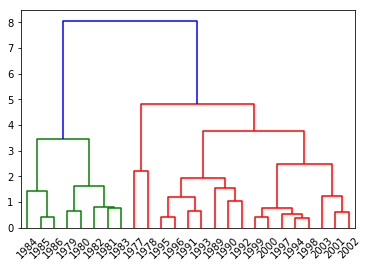

In [8]:
X = corr.replace(np.NaN,0).as_matrix()
plt.figure()
dendrogram(ward(X),labels=list(corr.index),distance_sort =True)
plt.show()

### 1.4 K-means 3 clusters

cluster:  1
[1977 1978]
cluster:  2
[1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003]
cluster:  3
[1979 1980 1981 1982 1983 1984 1985 1986]


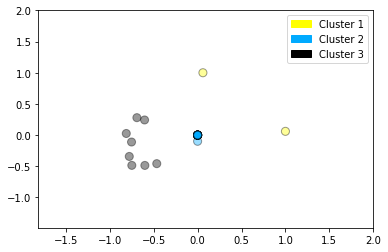

(25, 25) (25, 3)
cluster:  1
[1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003]
cluster:  2
[1979 1980 1981 1982 1983 1984 1985 1986]
cluster:  3
[1977 1978]


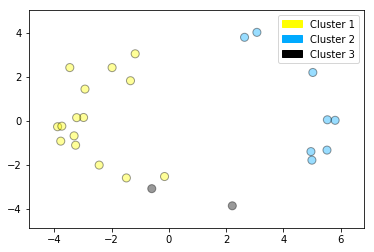

In [9]:
X = corr.replace(np.NaN,0).as_matrix()
labels = np.array(list(corr.index))
nclusters = 3

kmeans = KMeans(n_clusters = nclusters)
kmeans.fit(X)
pred_classes = kmeans.predict(X)

for cluster in range(nclusters):
    print('cluster: ', cluster+1)
    print(labels[np.where(pred_classes == cluster)])
    
plot_labelled_scatter(X, kmeans.labels_, ['Cluster 1', 'Cluster 2', 'Cluster 3'])

# Before applying PCA, each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X).transform(X)  

pca = PCA(n_components = 3).fit(X_normalized)

X_pca = pca.transform(X_normalized)
print(X.shape, X_pca.shape)

kmeans = KMeans(n_clusters = nclusters)
kmeans.fit(X_pca)
pred_classes = kmeans.predict(X_pca)

for cluster in range(nclusters):
    print('cluster: ', cluster+1)
    print(labels[np.where(pred_classes == cluster)])
    
plot_labelled_scatter(X_pca, kmeans.labels_, ['Cluster 1', 'Cluster 2', 'Cluster 3'])

#### Using PCA to find the first two principal components & to optimize clustering

### 1.5 K-means 2 clusters

#### Using PCA to find the first two principal components & to optimize clustering

cluster:  1
[1977 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 2003]
cluster:  2
[1978 1979 1980 1981 1982 1983 1984 1985 1986]


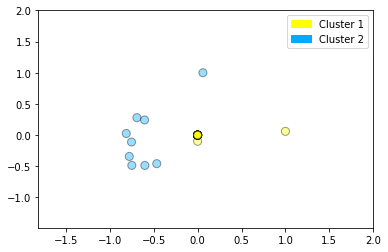

(25, 25) (25, 2)
cluster:  1
[1978 1979 1980 1981 1982 1983 1984 1985 1986]
cluster:  2
[1977 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 2003]


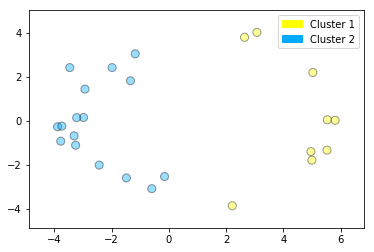

In [10]:
nclusters = 2
kmeans = KMeans(n_clusters = nclusters)
kmeans.fit(X)
pred_classes = kmeans.predict(X)

for cluster in range(nclusters):
    print('cluster: ', cluster+1)
    print(labels[np.where(pred_classes == cluster)])
    
plot_labelled_scatter(X, kmeans.labels_, ['Cluster 1', 'Cluster 2'])

pca = PCA(n_components = 2).fit(X_normalized)
X_pca = pca.transform(X_normalized)
print(X.shape, X_pca.shape)


kmeans = KMeans(n_clusters = nclusters)
kmeans.fit(X_pca)
pred_classes = kmeans.predict(X_pca)

for cluster in range(nclusters):
    print('cluster: ', cluster+1)
    print(labels[np.where(pred_classes == cluster)])
    
    
plot_labelled_scatter(X_pca, kmeans.labels_, ['Cluster 1', 'Cluster 2'])

### 1.6 Agglomerative clustering

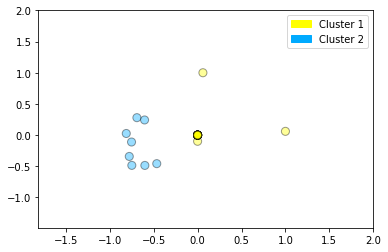

cluster:  1
[1977 1978 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003]
cluster:  2
[1979 1980 1981 1982 1983 1984 1985 1986]


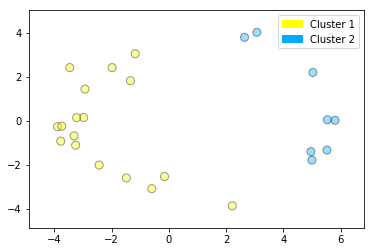

In [11]:
nclusters = 2
cls = AgglomerativeClustering(n_clusters = nclusters)
cls_assignment = cls.fit_predict(X)

plot_labelled_scatter(X, cls_assignment, 
        ['Cluster 1', 'Cluster 2'])### Agglomerative clustering

cls = AgglomerativeClustering(n_clusters = 2)
cls_assignment = cls.fit_predict(X_pca)

for cluster in range(nclusters):
    print('cluster: ', cluster+1)
    print(labels[np.where(cls_assignment == cluster)])
    
plot_labelled_scatter(X_pca, cls_assignment, 
        ['Cluster 1', 'Cluster 2'])### Agglomerative clustering

# Solution 2 : Data Imputation

## KNN Impute -> few observed

In [12]:
# Studying knnImpute NEED to debug and redevelop ... to be continued

missing_mask = Triangle.isnull()
test = knn_impute_few_observed(Triangle.as_matrix(), missing_mask.as_matrix(), 10, verbose=False, print_interval=100)
filled_triangle = pd.DataFrame(data = test, columns=Triangle.columns,index=Triangle.index)


In [13]:
data = [go.Surface(x=filled_triangle.index, y=filled_triangle.columns, z=filled_triangle.values.tolist(), colorscale='pink')]

layout = go.Layout(
    width=800,
    height=700,
    autosize=False,
    title='Incurred',
    scene=dict(
        xaxis=dict(
            title = 'Subscription year',
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            title = 'Devlopment year',
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            title = 'Incurred',
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    )
)

fig = dict(data=data, layout=layout)

# IPython notebook
offline.iplot(fig, filename='pandas-3d-surface', validate=False)

## KNN Impute -> arg partition

In [14]:
test = knn_impute_with_argpartition(Triangle.as_matrix(), missing_mask.as_matrix(), 10, verbose=False, print_interval=100)
filled_triangle2 = pd.DataFrame(data = test, columns=Triangle.columns,index=Triangle.index)


In [15]:
data = [go.Surface(x=filled_triangle2.index, y=filled_triangle2.columns, z=filled_triangle2.values.tolist(), colorscale='pink')]

layout = go.Layout(
    width=800,
    height=700,
    autosize=False,
    title='Incurred',
    scene=dict(
        xaxis=dict(
            title = 'Subscription year',
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            title = 'Devlopment year',
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            title = 'Incurred',
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    )
)

fig = dict(data=data, layout=layout)

# IPython notebook
offline.iplot(fig, filename='pandas-3d-surface', validate=False)

## KNN Impute -> optimistic

In [16]:
test = knn_impute_optimistic(Triangle.as_matrix(), missing_mask.as_matrix(), 10, verbose=False, print_interval=100)
filled_triangle3 = pd.DataFrame(data = test, columns=Triangle.columns,index=Triangle.index)


C:\Users\M427453\Documents\AF\Formation\Data_Science_projects\acturial_project\Project Python\reserve_risk_missing_data\knnimpute\optimistic.py:149: RuntimeWarning:

invalid value encountered in double_scalars



In [17]:
data = [go.Surface(x=filled_triangle3.index, y=filled_triangle3.columns, z=filled_triangle3.values.tolist(), colorscale='pink')]

layout = go.Layout(
    width=800,
    height=700,
    autosize=False,
    title='Incurred',
    scene=dict(
        xaxis=dict(
            title = 'Subscription year',
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            title = 'Devlopment year',
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            title = 'Incurred',
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    )
)

fig = dict(data=data, layout=layout)

# IPython notebook
offline.iplot(fig, filename='pandas-3d-surface', validate=False)

## KNN Impute -> reference

In [18]:
test = knn_impute_reference(Triangle.as_matrix(), missing_mask.as_matrix(), 10, verbose=False, print_interval=100)
filled_triangle4 = pd.DataFrame(data = test, columns=Triangle.columns,index=Triangle.index)


In [19]:
data = [go.Surface(x=filled_triangle4.index, y=filled_triangle4.columns, z=filled_triangle4.values.tolist(), colorscale='pink')]

layout = go.Layout(
    width=800,
    height=700,
    autosize=False,
    title='Incurred',
    scene=dict(
        xaxis=dict(
            title = 'Subscription year',
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            title = 'Devlopment year',
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            title = 'Incurred',
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    )
)

fig = dict(data=data, layout=layout)

# IPython notebook
offline.iplot(fig, filename='pandas-3d-surface', validate=False)

In [20]:
# Some useful codes

# diagLine = np.where(Triangle.iloc[:,0]>0)[0] -1
# Triangle_inv = Triangle[Triangle.columns[::-1]]
# Triangle_inv = Triangle_inv.where(np.triu(np.ones(Triangle_inv.shape),).astype(np.bool))